**Edycja cnn01.**
Sieć konwolucyjna dla danych 1D. Dane pochodzą z pliku juices.mat.

Dane zawierają macierz sygnałów X(510,360) oraz numer klasy soku 0-5 y(510,1).

**Modyfikacje:**

+ zwiększenie batch_size do 16
+ zwiększenie liczby epok do 250

Dzięki temu uzyskano wyniki:
accuracy (train): 0.96,
accuracy (test): 0.92

Następnie dodano model.add(Dense(120, relu) uzyskując:

accuracy(train): 0.95, accuracy(test): 0.95

Po zmniejszeniu liczby epok do 200 jednokrotnie uzyskano wynik:
accuracy(train): 0.98, accuracy(test): 0.96

Niestety tego wyniku nie udało się odtworzyć w kolejnych próbach, a dokładność jest o wiele niższa.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [ ]:
mat = spio.loadmat('juices.mat', squeeze_me=True) 
X = mat['X']
y = mat['y'] 
y = to_categorical(y)
print(y[:10])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
X_train = np.expand_dims(X_train, axis=2) 
X_test = np.expand_dims(X_test, axis=2) 

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(360,1)))

model.add(Conv1D(64, 6, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=180, activation='relu'))
model.add(Dense(units=120, activation='relu'))
model.add(Dense(60, activation='relu'))

model.add(Dense(6, activation='softmax')) #wyjście, 6 klas

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 354, 16)           128       
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 349, 64)           6208      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 116, 64)           0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 116, 64)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 112, 128)          41088     
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 37, 128)           0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 37, 128)         

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mymodel = model.fit(X_train, y_train,
    batch_size=16, 
    epochs=250, 
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[es]
)

Epoch 1/250
24/24 [==============================] - 1s 52ms/step - loss: 1.8438 - accuracy: 0.1571 - val_loss: 1.7946 - val_accuracy: 0.1172
Epoch 2/250
24/24 [==============================] - 1s 36ms/step - loss: 1.7919 - accuracy: 0.1806 - val_loss: 1.7918 - val_accuracy: 0.1719
Epoch 3/250
24/24 [==============================] - 1s 36ms/step - loss: 1.7901 - accuracy: 0.1963 - val_loss: 1.7881 - val_accuracy: 0.1797
Epoch 4/250
24/24 [==============================] - 1s 36ms/step - loss: 1.7861 - accuracy: 0.1937 - val_loss: 1.7816 - val_accuracy: 0.1250
Epoch 5/250
24/24 [==============================] - 1s 37ms/step - loss: 1.7817 - accuracy: 0.2068 - val_loss: 1.7794 - val_accuracy: 0.2578
Epoch 6/250
24/24 [==============================] - 1s 37ms/step - loss: 1.7483 - accuracy: 0.2277 - val_loss: 1.7604 - val_accuracy: 0.2344
Epoch 7/250
24/24 [==============================] - 1s 38ms/step - loss: 1.6495 - accuracy: 0.2539 - val_loss: 1.7057 - val_accuracy: 0.2266
Epoch 


Accuracy (train): 0.86
Accuracy (test): 0.81

History:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


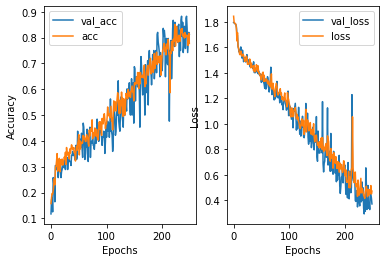

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=8, verbose=0) 
print('\nAccuracy (train): {:.2f}'.format(train_acc))
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=8, verbose=0) 
print('Accuracy (test): {:.2f}'.format(test_acc))

print('\nHistory: ', mymodel.history.keys())

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(mymodel.history['val_accuracy'])
plt.plot(mymodel.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['val_acc', 'acc'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(mymodel.history['val_loss'])
plt.plot(mymodel.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['val_loss', 'loss'], loc='upper right')
plt.show()

**------------------------Obrazy z keagle---------------------------**

**Modyfikacje:**

Ostatecznie dodano Dense(64, relu) oraz Dense(32, relu) oraz zwiększono liczbę epok do 30. Uzyskano accuracy(test): 0.939 co było najwyższym wynikiem.

Inne zmiany dotyczyły:
+ epochs -> 25, batch ->64, uzyskując acc=0.935
+ dropout -> 0.1, uzyskując acc=0.9
+ pool_size -> (5,5), uzyskując acc=0.7

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt      
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn   
import matplotlib.pyplot as plt             
import cv2                                 
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
class_names = ['buildings', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150)

In [ ]:
def load_data():
       
    datasets = ['/content/drive/My Drive/iidata/train', '/content/drive/My Drive/iidata/test']
    output = []
    
    for dataset in datasets: # wczytaj z folderu train i test
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # wczytaj pliki z folderów odpowiadającyh poszczególnym klasom
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # wczytaj poszczególne obrazy z folderu
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
              # pobieranie ścieżki dostępu do pliku z obrazkiem
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # wczytanie i dopasowanie wielkości
                image = cv2.imread(img_path)
                # obrazy zapisane są w fromacie BGR, który nie jest najlepszy do wykrywania kolorów
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # konwersja pomiędzy modelami kolorów (tutaj do RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # dodawanie obrazu i etykiety do zbioru wyjściowego
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/My Drive/iidata/train


100%|██████████| 200/200 [00:56<00:00,  3.52it/s]


Loading /content/drive/My Drive/iidata/test


100%|██████████| 100/100 [00:21<00:00,  4.55it/s]


Number of training images: 418
Number of testing images: 200
Each image size is: (150, 150)


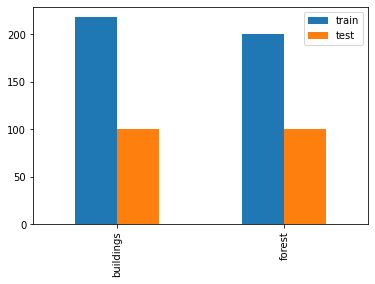

In [ ]:
n_train = train_labels.shape[0] # pierwszy wymiar tensora to liczba próbek
n_test = test_labels.shape[0] # pierwszy wymiar tensora to liczba próbek

print ("Number of training images: {}".format(n_train))
print ("Number of testing images: {}".format(n_test))
print ("Each image size is: {}".format(IMAGE_SIZE))

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
df=pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names)
df.plot.bar()
plt.show()

train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_images(class_names, images, labels, n_images):

    fig = plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(n_images/5+1,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

Some examples of images


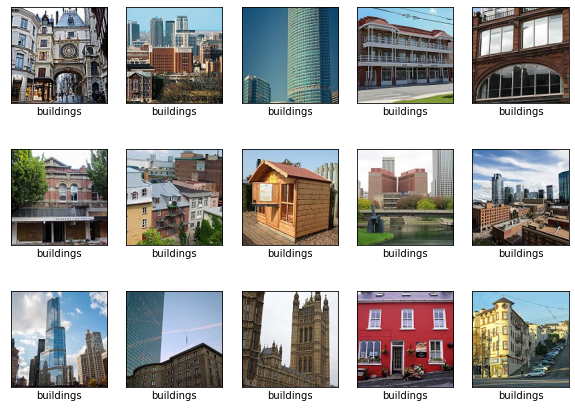

In [ ]:
print('Some examples of images')
display_images(class_names, train_images, train_labels, 15)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2, activation='softmax')) # w tej wersji danych dwie klasy

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               921728    
_________________________________________________________________
dense_56 (Dense)             (None, 64)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
7/7 [==============================] - 6s 924ms/step - loss: 0.7389 - accuracy: 0.6100 - val_loss: 0.5802 - val_accuracy: 0.7200
Epoch 2/30
7/7 [==============================] - 6s 864ms/step - loss: 0.4594 - accuracy: 0.8206 - val_loss: 0.3012 - val_accuracy: 0.8700
Epoch 3/30
7/7 [==============================] - 6s 862ms/step - loss: 0.3028 - accuracy: 0.8828 - val_loss: 0.2426 - val_accuracy: 0.8950
Epoch 4/30
7/7 [==============================] - 6s 862ms/step - loss: 0.2499 - accuracy: 0.9043 - val_loss: 0.2165 - val_accuracy: 0.8850
Epoch 5/30
7/7 [==============================] - 6s 860ms/step - loss: 0.2068 - accuracy: 0.9282 - val_loss: 0.2082 - val_accuracy: 0.9300
Epoch 6/30
7/7 [==============================] - 6s 865ms/step - loss: 0.1853 - accuracy: 0.9282 - val_loss: 0.2232 - val_accuracy: 0.9050
Epoch 7/30
7/7 [==============================] - 6s 871ms/step - loss: 0.1617 - accuracy: 0.9498 - val_loss: 0.1986 - val_accuracy: 0.9250
Epoch 8/30
7/7 [====

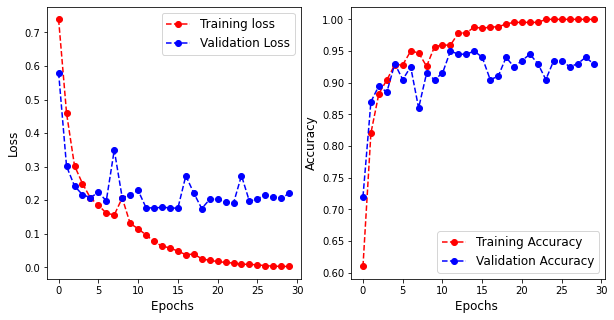

Accuracy (test):  0.9300000071525574
Loss (test):  0.2210175096988678


In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history['loss'],'ro--')
plt.plot(history.history['val_loss'],'bo--')
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Loss',fontsize=12)
 
plt.subplot(122)
plt.plot(history.history['accuracy'],'ro--')
plt.plot(history.history['val_accuracy'],'bo--')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.xlabel('Epochs ',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

scores = model.evaluate(test_images, test_labels, verbose=0)
print('Accuracy (test): ', scores[1])
print('Loss (test): ', scores[0])

(array([  2,  25,  31,  37,  66, 102, 107, 163, 165, 178, 179, 181, 184,
       192]),)

Mislabeled images


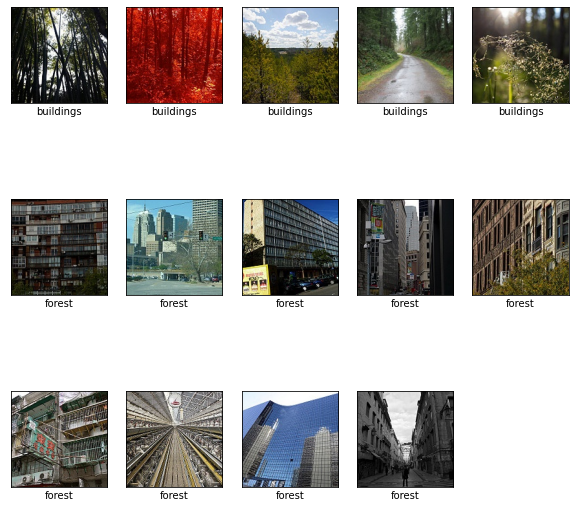

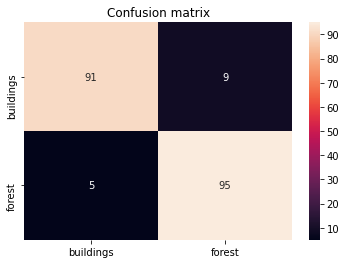

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    print(mislabeled_indices) # pozycje błędnie zaklasyfikowanych próbek
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    print("\nMislabeled images")
    display_images(class_names,  mislabeled_images, mislabeled_labels, len(mislabeled_labels))

pred_labels=model.predict(test_images) # pred_labels w notacji one-hot
pred_labels = np.argmax(pred_labels, axis=-1) # etykieta to numer klasy
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Augumentacja

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
print('Real-time data augmentation')

# Konfiguracja klasy ImageDataGenerator modyfikującej dane
datagen = ImageDataGenerator(
    rotation_range=15,  # rotacja (0 to 180)
    width_shift_range=0.1, # losowe poziome przekształcenie (frakcja całkowitej szerokości)
    height_shift_range=0.1, # losowe pionowe przekształcenie (frakcja całkowitej wysokości)
    zoom_range=0.2, #zakres losowego przypliżania obrazów
    horizontal_flip=True,  # losowe odbicie połowy obrazu w płaszczyznie poziomej
    fill_mode='nearest' # strategia wypełniania nowo utworzonych pikseli
)

datagen.fit(train_images)

model.fit(datagen.flow(train_images, train_labels, batch_size=128), # generacja wsadów danych na podstwie danych treningowych
                        epochs=10,
                        validation_data=(test_images, test_labels), # nie modyfikować danych walidacyjnych
                        steps_per_epoch=10 #ile wsadów na epokę
)

scores = model.evaluate(test_images, test_labels, verbose=0)
print('Accuracy (test): ', scores[1])
print('Loss (test): ', scores[0])

Using TensorFlow backend.


Real-time data augmentation
Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: 0.3799 - accuracy: 0.8727 - val_loss: 0.2239 - val_accuracy: 0.9300
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 0.2155 - accuracy: 0.9098 - val_loss: 0.4813 - val_accuracy: 0.8200
Epoch 3/10
10/10 [==============================] - 19s 2s/step - loss: 0.1777 - accuracy: 0.9313 - val_loss: 0.3087 - val_accuracy: 0.8950
Epoch 4/10
10/10 [==============================] - 18s 2s/step - loss: 0.1680 - accuracy: 0.9319 - val_loss: 0.3758 - val_accuracy: 0.8750
Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 0.1407 - accuracy: 0.9423 - val_loss: 0.3190 - val_accuracy: 0.8950
Epoch 6/10
10/10 [==============================] - 18s 2s/step - loss: 0.1130 - accuracy: 0.9589 - val_loss: 0.2880 - val_accuracy: 0.8900
Epoch 7/10
10/10 [==============================] - 19s 2s/step - loss: 0.1183 - accuracy: 0.9570 - val_loss: 0.3053 - val_accuracy: